<a href="https://colab.research.google.com/github/janmejaybhoi/Text-Classification_with_Fine-Tune-BERT_TensorFlow/blob/main/Fine_Tune_BERT_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://media.geeksforgeeks.org/wp-content/uploads/20200407004025/semi-supervised.jpg' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

# Useful Links


*   https://jalammar.github.io/illustrated-transformer/
*   https://jalammar.github.io/illustrated-bert/


*   https://nlp.seas.harvard.edu/2018/04/03/attention.html
*   https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/





In [2]:
!nvidia-smi

Wed Oct  7 12:07:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install TensorFlow and TensorFlow Model Garden

In [1]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [ ]:
!pip install -q tensorflow==2.3.0

In [3]:
# Clone tensorFlow morden garden a repository with a number of different implementations of state-of-the-art (SOTA) models and modeling solutions for TensorFlow users.
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2318/2318), done.
remote: Total 2650 (delta 512), reused 1350 (delta 299), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 3.93 MiB/s, done.
Resolving deltas: 100% (512/512), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [4]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 194kB 7.4MB/s 
     |████████████████████████████████| 14.5MB 240kB/s 
     |████████████████████████████████| 9.5MB 56.1MB/s 
     |████████████████████████████████| 460kB 70.0MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 25.9MB 95kB/s 
     |████████████████████████████████| 174kB 66.8MB/s 
     |████████████████████████████████| 3.5MB 24.2MB/s 
     |████████████████████████████████| 1.1MB 69.9MB/s 
     |████████████████████████████████| 358kB 81.1MB/s 
     |████████████████████████████████| 1.1MB 79.4MB/s 
     |████████████████████████████████| 11.6MB 222kB/s 
     |████████████████████████████████| 36.7MB 89kB/s 
     |████████████████████████████████| 276kB 63.8MB/s 
     |████████████████████████████████| 2.2MB 59.1MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 

# Download and Import the Quora Insincere Questions Dataset

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [3]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.9.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [4]:
import numpy as np
import pandas as pd
# reading the dataset from the link or you can download it from kaggle alos
# https://www.kaggle.com/c/quora-insincere-questions-classification/data
df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip', compression = 'zip',
                 low_memory = False)
# checking the no of row and columns in the dataset
df.shape

(1306122, 3)

In [8]:
df.head(20)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


<AxesSubplot:title={'center':'target distribution'}, ylabel='Frequency'>

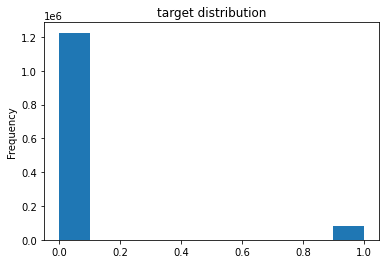

In [9]:
# Ploting the target Dustribution of the dataset.
df.target.plot(kind = 'hist', title = 'target distribution')

As you can see here its a imbalanced dataset, we have to set our split data show that both the target labels should be present in train and test set. So we use stratified sampling to overcome this.

# Create tf.data.Datasets for Training and Evaluation

In [10]:
from sklearn.model_selection import train_test_split
train_df , remaining = train_test_split(df, random_state = 42 , train_size = 0.0075, stratify = df.target.values)
valid_df , _ = train_test_split(remaining, random_state= 42 , train_size = 0.00075, stratify =remaining.target.values)
# ensure the shape of both train and test data
train_df.shape , valid_df.shape

((9795, 3), (972, 3))

As the dataset is preety huge,the whole dataset take much longer to train so we use only a small train and test portion, set a ratio of 90% train and 10% test.Secondly to overcome the io bottleneck we use tf.data.Dataset pipelines.

In [25]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df.question_text.values, train_df.target.values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.question_text.values, valid_df.target.values))
  
  # reading from tensorflow data pipeline
  for text,label in train_data.take(1):
    print(text)
    print(label)  

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


##  Download a Pre-trained BERT Model from TensorFlow Hub

In [17]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""
 # Label categories
label_list = [0,1]
# maximum length of (token) input sequences
max_seq_length = 128
# Define the batch size
train_batch_size = 32


# Get BERT layer and tokenizer:
# BERT details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [20]:
tokenizer.wordpiece_tokenizer.tokenize('hey, how are you ?')

['hey', '##,', 'how', 'are', 'you', '?']

In [21]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hey, how are you ?'))

[4931, 29623, 2129, 2024, 2017, 1029]

##  Tokenize and Preprocess Text for BERT

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [22]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                             text_a= text.numpy(),
                                             text_b =None, 
                                             label= label.numpy()) 
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)
  
  

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

##  Wrap a Python Function into a TensorFlow op for Eager Execution

In [23]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature,inp =[text, label],
                                                                Tout=[tf.int32,tf.int32,tf.int32,tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
      'input_word_ids': input_ids,
       'input_mask': input_mask,
       'input_type_ids': segment_ids
  }

  return (x,label_id)
  
  

##  Create a TensorFlow Input Pipeline with `tf.data`

In [26]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map, 
                               num_parallel_calls =tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))
  # valid
  valid_data = (valid_data.map(to_feature_map, 
                               num_parallel_calls =tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder = True)
  .prefetch(tf.data.experimental.AUTOTUNE))
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [27]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [28]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

##  Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [35]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation= 'sigmoid', name = 'output')(drop)

  model = tf.keras.Model(
      inputs = {
       'input_word_ids': input_word_ids,
       'input_mask': input_mask,
       'input_type_ids': input_type_ids
          
      },
      outputs = output
  )
  return model

##  Fine-Tune BERT for Text Classification

In [38]:
model = create_model()
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=2e-5),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

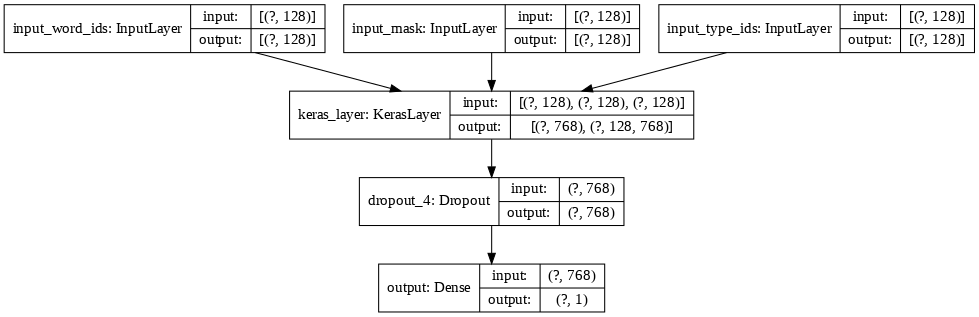

In [41]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi =75)

In [45]:
# Train model
epochs = 4
history = model.fit(train_data,
          validation_data=valid_data,
          epochs = epochs,
          verbose = 1)


Epoch 1/4
306/306 [==============================] - ETA: 0s - loss: 0.0148 - binary_accuracy: 0.9953WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0141s vs `on_test_batch_end` time: 0.1383s). Check your callbacks.


306/306 [==============================] - 146s 478ms/step - loss: 0.0148 - binary_accuracy: 0.9953 - val_loss: 0.2203 - val_binary_accuracy: 0.9500
Epoch 2/4
306/306 [==============================] - 146s 478ms/step - loss: 0.0068 - binary_accuracy: 0.9979 - val_loss: 0.2746 - val_binary_accuracy: 0.9594
Epoch 3/4
306/306 [==============================] - 146s 478ms/step - loss: 0.0089 - binary_accuracy: 0.9971 - val_loss: 0.2665 - val_binary_accuracy: 0.9479
Epoch 4/4
306/306 [==============================] - 146s 478ms/step - loss: 0.0081 - binary_accuracy: 0.9975 - val_loss: 0.2688 - val_binary_accuracy: 0.9573


### Evaluate the BERT Text Classification Model

In [46]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

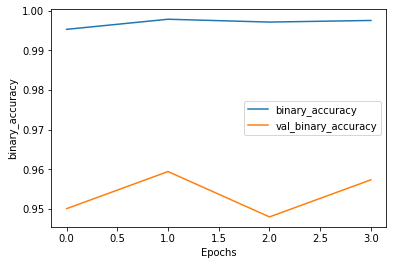

In [47]:
plot_graphs(history, 'binary_accuracy')

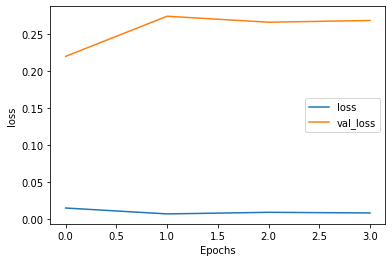

In [48]:
plot_graphs(history, 'loss')

In [60]:
sample_examples = ['Are you ashamed of being an Indian?',' you are a racist', ' Its really helpfull, thank you', ' Thanks for you help',]
test_data = tf.data.Dataset.from_tensor_slices((sample_examples, [0]*len(sample_examples)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
threshold = 0.7
['Insincere' if pred>= threshold else 'Sincere' for pred in preds]

['Insincere', 'Insincere', 'Sincere', 'Sincere']